In [1]:
#import the relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\Namukaba Katambo\Desktop\APIs\data.csv")
data.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
0,Afghanistan,60.0,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,4.47,...,638.0,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0
1,Albania,105.0,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,1.62,...,15.0,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0
2,Algeria,18.0,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,3.02,...,112.0,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0
3,Angola,26.0,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,5.52,...,241.0,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0
4,Argentina,17.0,54.3,2780400.0,105000.0,17.02,201348.0,232.75,53.5,2.26,...,39.0,3.35,17.6,3.96,44938712.0,61.3,10.1,106.3,9.79,41339571.0


In [3]:
data.set_index('Country', inplace=True)
data.head()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Maternal mortality ratio,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,60.0,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,4.47,2.1,...,638.0,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0
Albania,105.0,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,1.62,28.1,...,15.0,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0
Algeria,18.0,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,3.02,0.8,...,112.0,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0
Angola,26.0,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,5.52,46.3,...,241.0,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0
Argentina,17.0,54.3,2780400.0,105000.0,17.02,201348.0,232.75,53.5,2.26,9.8,...,39.0,3.35,17.6,3.96,44938712.0,61.3,10.1,106.3,9.79,41339571.0


# Standardize the data

In [4]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df=scaler.fit_transform(data)

# Hierarchical Clustering

Hierarchical clustering works by creating, a hierarchy of groups of objects.The objects are measured on several features that can be continuous, ordinal, or nominal.
The hierarchy is typically displayed as a tree, called a dendrogram, with all the individual objects as separate individual leaves at one end of the tree and a full collection of the objects at the opposite, or root, end.

There are two forms of hierarchical clustering but for this project I'll mainly focus on Agglomerative Algorithm.

Agglomerative in which all objects start as their own cluster (i.e., each initial cluster has only one object) and the hierarchy is built upward from that point Higher-level clusters are built from lower-level clusters. The dendrogram is thus
built from the bottom up; this is a bottoms-up approach  - Walter R.Paczkowski Business Analytics


To implement this clustering algorithm, I need two things: a distance metric between pairs of clusters and
a rule for how clusters are joined or linked based on the distance metric. The metric is how the distances are calculated based on a set of features. The linkage is what determines how the distance between two clusters are determined when those clusters consist of several objects

In [5]:
import scipy.cluster.hierarchy as shc

In [6]:
#instantiate the linkage Method
ward=shc.linkage(df, method='ward')

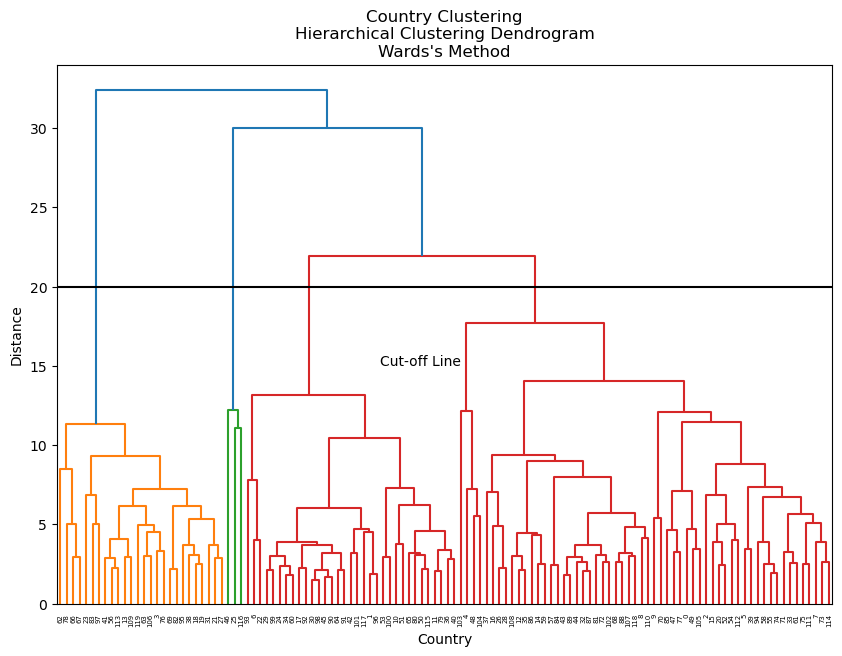

In [7]:
plt.figure(figsize=(10,7))
shc.dendrogram(ward)
plt.title('Country Clustering\nHierarchical Clustering Dendrogram\nWards\'s Method')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.text(500,15, 'Cut-off Line')

max_dist=20
plt.axhline(y= max_dist, c='Black', ls='-',lw=1.5 )

It should be clear that there are many hierarchical clustering solutions you can
create. You can create these by varying these hyperparameters:
1. distance metric
2. linkage method
3. cut-off line
4. features

In [8]:
cluster_labels=shc.fcluster(ward,max_dist,criterion='distance')
data['Cluster_id']=cluster_labels

data.head()

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Cluster_id
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,60.0,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,4.47,2.1,...,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,4
Albania,105.0,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,1.62,28.1,...,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,3
Algeria,18.0,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,3.02,0.8,...,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,4
Angola,26.0,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,5.52,46.3,...,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,1
Argentina,17.0,54.3,2780400.0,105000.0,17.02,201348.0,232.75,53.5,2.26,9.8,...,3.35,17.6,3.96,44938712.0,61.3,10.1,106.3,9.79,41339571.0,4


In [9]:
#adding the coutry column back into the data frame
df_reset = data.reset_index()
df_reset.head()

,Country,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,...,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Cluster_id
0,Afghanistan,60.0,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,4.47,...,0.43,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,4
1,Albania,105.0,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,1.62,...,1.12,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,3
2,Algeria,18.0,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,3.02,...,0.95,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,4
3,Angola,26.0,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,5.52,...,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,1
4,Argentina,17.0,54.3,2780400.0,105000.0,17.02,201348.0,232.75,53.5,2.26,...,3.35,17.6,3.96,44938712.0,61.3,10.1,106.3,9.79,41339571.0,4


In [10]:
data['Cluster_id'].unique()

array([4, 3, 1, 2])

In [11]:
clustered_countries = df_reset.groupby('Cluster_id')['Country'].count()
clustered_countries

Cluster_id
1    26
2     3
3    33
4    58
Name: Country, dtype: int64

In [12]:
data[data['Cluster_id']==2]

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Cluster_id
Country,,,,,,,,,,,,,,,,,,,,,
China,153.0,56.2,9596960.0,2695000.0,10.90,9893038.0,125.08,2.9,1.69,22.4,...,0.87,32.4,1.98,1.397715e+09,68.0,9.4,59.2,4.32,842933962.0,2
India,464.0,60.4,3287263.0,3031000.0,17.86,2407672.0,180.44,7.7,2.22,23.8,...,0.30,65.1,0.86,1.366418e+09,49.3,11.2,49.7,5.36,471031528.0,2
United States,36.0,44.4,9833517.0,1359000.0,11.60,5006302.0,117.24,7.5,1.73,33.9,...,7.25,11.1,2.61,3.282395e+08,62.0,9.6,36.6,14.70,270663028.0,2


In [13]:
data[data['Cluster_id']==1]

,Density\n(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),Fertility Rate,Forested Area (%),...,Minimum wage,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Cluster_id
Country,,,,,,,,,,,,,,,,,,,,,
Angola,26.0,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,5.52,46.3,...,0.71,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,1
Benin,108.0,33.3,112622.0,12000.0,36.22,6476.0,110.71,-0.9,4.84,37.8,...,0.39,40.5,0.08,11801151.0,70.9,10.8,48.9,2.23,5648149.0,1
Burkina Faso,76.0,44.2,274200.0,11000.0,37.93,3418.0,106.58,-3.2,5.19,19.3,...,0.34,36.1,0.08,20321378.0,66.4,15.0,41.3,6.26,6092349.0,1
Ivory Coast,83.0,64.8,322463.0,27000.0,35.74,9674.0,111.61,-0.9,4.65,32.7,...,0.36,36.0,0.23,25716544.0,57.0,11.8,50.1,3.32,13176900.0,1
Cameroon,56.0,20.6,475440.0,24000.0,35.39,8291.0,118.65,2.5,4.57,39.3,...,0.35,69.7,0.09,25876380.0,76.1,12.8,57.7,3.38,14741256.0,1
Central African Republic,8.0,8.2,622984.0,8000.0,35.35,297.0,186.86,37.1,4.72,35.6,...,0.37,39.6,0.06,4745185.0,72.0,8.6,73.3,3.68,1982064.0,1
Republic of the Congo,16.0,31.1,342000.0,12000.0,32.86,3282.0,124.74,2.2,4.43,65.4,...,0.88,43.8,0.12,5380508.0,69.4,9.0,54.3,9.47,3625010.0,1
Democratic Republic of the Congo,40.0,11.6,2344858.0,134000.0,41.18,2021.0,133.85,2.9,5.92,67.2,...,0.18,37.4,0.07,86790567.0,63.5,10.7,50.7,4.24,39095679.0,1
The Gambia,239.0,59.8,11300.0,1000.0,38.54,532.0,172.73,7.1,5.22,48.4,...,0.13,20.3,0.10,2347706.0,59.4,9.4,48.4,9.06,1453958.0,1


In [14]:
#creating Subsets of the main DF
var=['Unemployment rate','Birth Rate','Co2-Emissions','Cluster_id']
sub_var=data[var]

In [15]:
#creating Subsets of the main DF
var1=['Infant mortality','Life expectancy','CPI','Cluster_id']
sub_var1=data[var1]

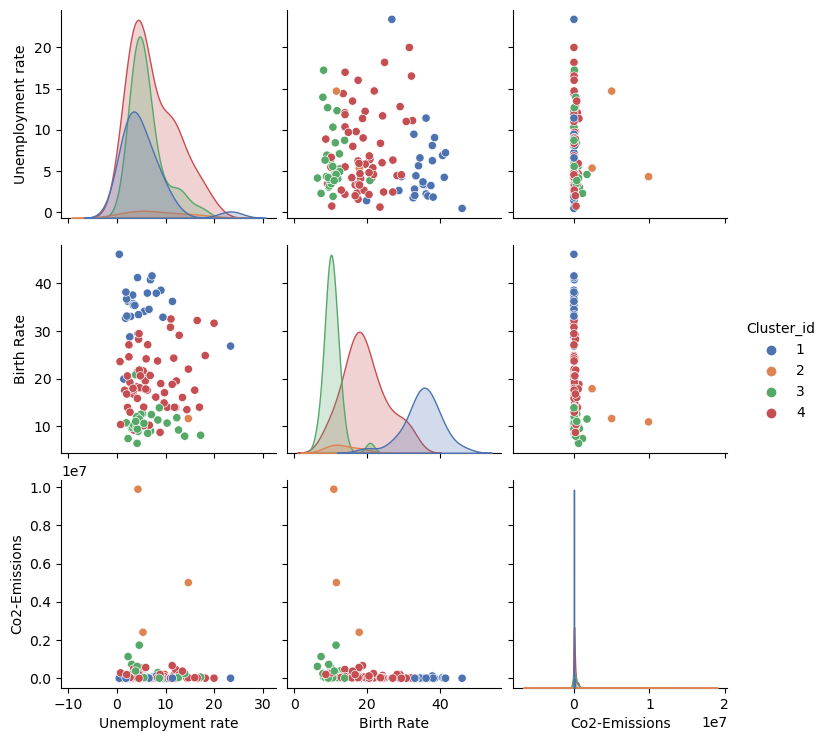

In [16]:
sns.pairplot(sub_var, hue ='Cluster_id',palette='deep')